In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
np.random.seed(42)

# Pareto distribution
The probability density for the Pareto distribution is

$$f(x) = \frac{\alpha m^{\alpha}}{x^{\alpha + 1}}$$

where $\alpha$ is the shape and $m$ is the scale (or mode).

In [3]:
def pareto_dist(alpha, x):
    # let m = 1
    return alpha / np.power(x, (alpha + 1))

$$
f(x) = \begin{cases} 
\frac{\alpha m^a}{x^{\alpha+1}} & x \geq m \\\\
0 & x < m
\end{cases} 
$$
The mean of the Pareto distribution is calculated as follows:
$$ \text{Mean} = E[X] = \int_m^\infty x f(x; \alpha, m) \, dx $$
Substituting the PDF:
$$ E[X] = \int_m^\infty x \frac{\alpha m^\alpha}{x^{\alpha+1}} \, dx = \alpha m^\alpha \int_m^\infty \frac{1}{x^{\alpha }} \, dx $$
Let $u = x^{-\alpha+1}$:
$$ E[X] = \alpha m^\alpha \left[ \frac{x^{-\alpha+1+1}}{-\alpha+1} \right]_m^\infty $$
Evaluating the integral:
$$ E[X] = \alpha m^\alpha \left[ \frac{m^{-\alpha+1+1} - \infty^{-\alpha+1+1}}{-\alpha+1} \right] $$
Since $ \infty^{-\alpha+1+1} $ approaches 0 for $\alpha > 1$:
$$ E[X] = \alpha m^\alpha \left[ \frac{m}{-\alpha+1} \right] = \alpha m \frac{1}{\alpha-1} = \frac{\alpha m}{\alpha-1} $$
Given that \( m = 1 \):
$$ E[X] = \frac{\alpha}{\alpha-1} $$
Thus, the mean of the Pareto distribution with shape parameter $\alpha$ and scale parameter \(m = 1\) is:
$$ \text{Mean} = \frac{\alpha}{\alpha-1} $$
### Important Note:
The mean exists only if \( \alpha > 1 \). If \( \alpha \le 1 \), the mean of the Pareto distribution is infinite.
### Summary:
The function `pareto_mean(a)` calculates the mean of a Pareto distribution with shape parameter \(\alpha\) and scale parameter \(m = 1\), returning \( \frac{\alpha}{\alpha-1} \). This is a key property of the Pareto distribution and is useful in various applications where the Pareto distribution models real-world phenomena.

In [4]:
def pareto_mean(a):
    # let m = 1
    return a/(a-1)

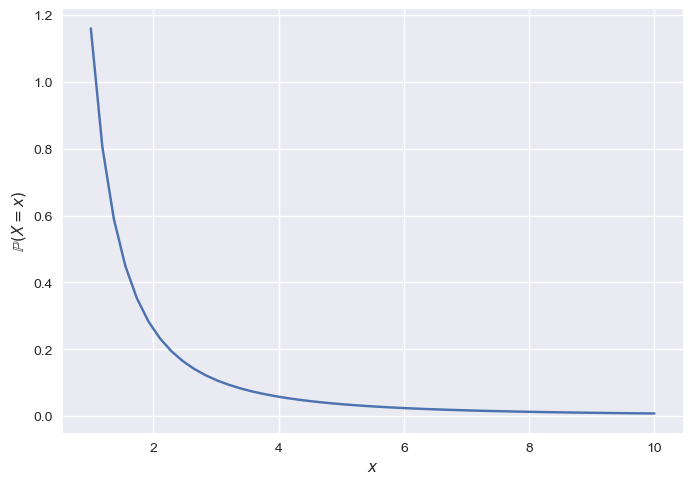

In [5]:
x_min = 1
x = np.linspace(x_min, 10)
Px = pareto_dist(alpha=1.16, x=x)
plt.plot(x, Px)
plt.ylabel('$\mathbb{P}(X = x)$')
plt.xlabel('$x$');

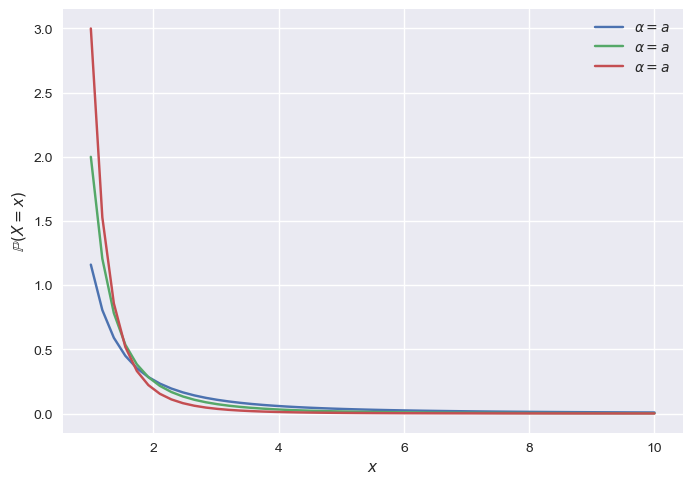

In [6]:
x_min = 1
x = np.linspace(x_min, 10)

for a in [1.16, 2, 3]:
    Px = pareto_dist(alpha=a, x=x)
    plt.plot(x, Px, label=r'$\alpha = {a}$')
    
plt.ylabel('$\mathbb{P}(X = x)$')
plt.xlabel('$x$')
plt.legend();

In [7]:
a = 3 # alpha
m = 2 # mode or scale

# 1000 of sample size which has x_min = 1 and scaled by m
pareto_sample = (np.random.pareto(a, 10000) + 1) * m

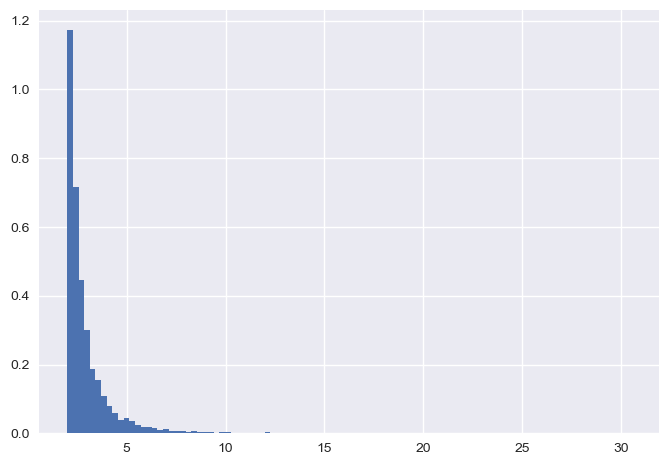

In [8]:
plt.hist(pareto_sample, 100, density=True);

# compare with normal distribution
The probability density function for normal distribution is 

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

where $\mu$ is mean and $\sigma$ is standard deviation.

In [9]:
normal_sample = np.random.normal(loc=0, scale=1, size=10000)

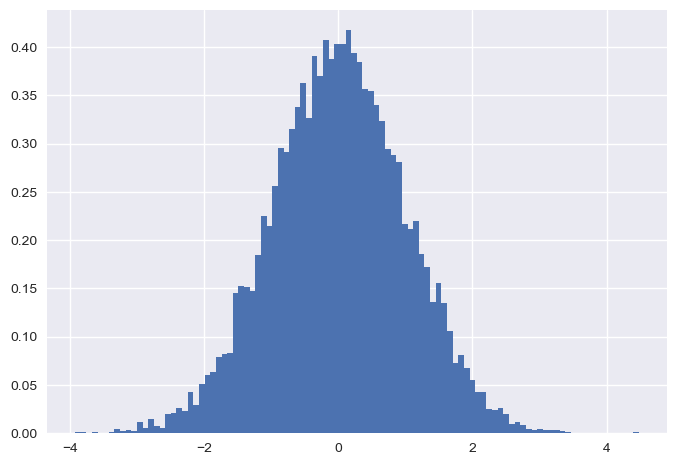

In [10]:
plt.hist(normal_sample, 100, density=True);

In [11]:
size = 10000
alpha = 1.16
true_mean = pareto_mean(alpha)
normal_sample = np.random.normal(loc=true_mean, scale=4, size=size)
pareto_sample = (np.random.pareto(alpha, size) + 1) * 1

range_size = np.arange(1, size + 1)
normal_cum_mean = np.cumsum(normal_sample) / range_size
pareto_cum_mean = np.cumsum(pareto_sample) / range_size

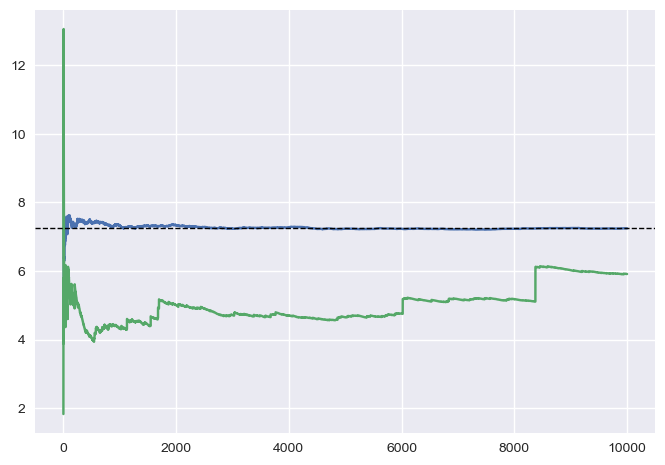

In [12]:
plt.plot(range_size, normal_cum_mean)
plt.plot(range_size, pareto_cum_mean)
plt.axhline(y = true_mean, color='k',  linestyle = '--', linewidth=1);